<a href="https://colab.research.google.com/github/Husam270/Shai/blob/main/Copy_of_Copy_of_ShAI_project_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports here 

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diamonds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diamonds.csv', usecols=range(1, 11))
#index is redundant so we skip the first column when reading 
diamonds 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We make notes of Q1, Q3 and calculate the IQR= Q3-Q1=4374

In [ ]:
diamonds["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
diamonds.groupby(["color"]).mean()

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251


In [ ]:
diamonds["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [ ]:
diamonds.groupby(["clarity"]).mean()

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465


In [ ]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
diamonds.groupby(["cut"]).mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


In [ ]:
diamonds.groupby(["cut", "clarity", "color"]).mean().head(276)

carat      depth  ...         y         z
cut       clarity color                       ...                    
Fair      I1      D      1.877500  65.600000  ...  7.422500  4.905000
                  E      0.968889  65.644444  ...  6.061111  4.008889
                  F      1.023429  65.657143  ...  6.040571  4.000857
                  G      1.226415  65.333962  ...  6.434906  4.233962
                  H      1.498654  65.759615  ...  6.858462  4.549231
...                           ...        ...  ...       ...       ...
Very Good VVS2    F      0.571365  61.541767  ...  5.140803  3.152209
                  G      0.650695  61.821523  ...  5.381159  3.316159
                  H      0.593724  61.895862  ...  5.170414  3.190690
                  I      0.701831  61.957746  ...  5.506479  3.403099
                  J      1.102069  62.410345  ...  6.368966  3.964828

[276 rows x 7 columns]



# DO NOT RERUN THIS CELL, IT TAKES 5 MINUTES TO RENDER!


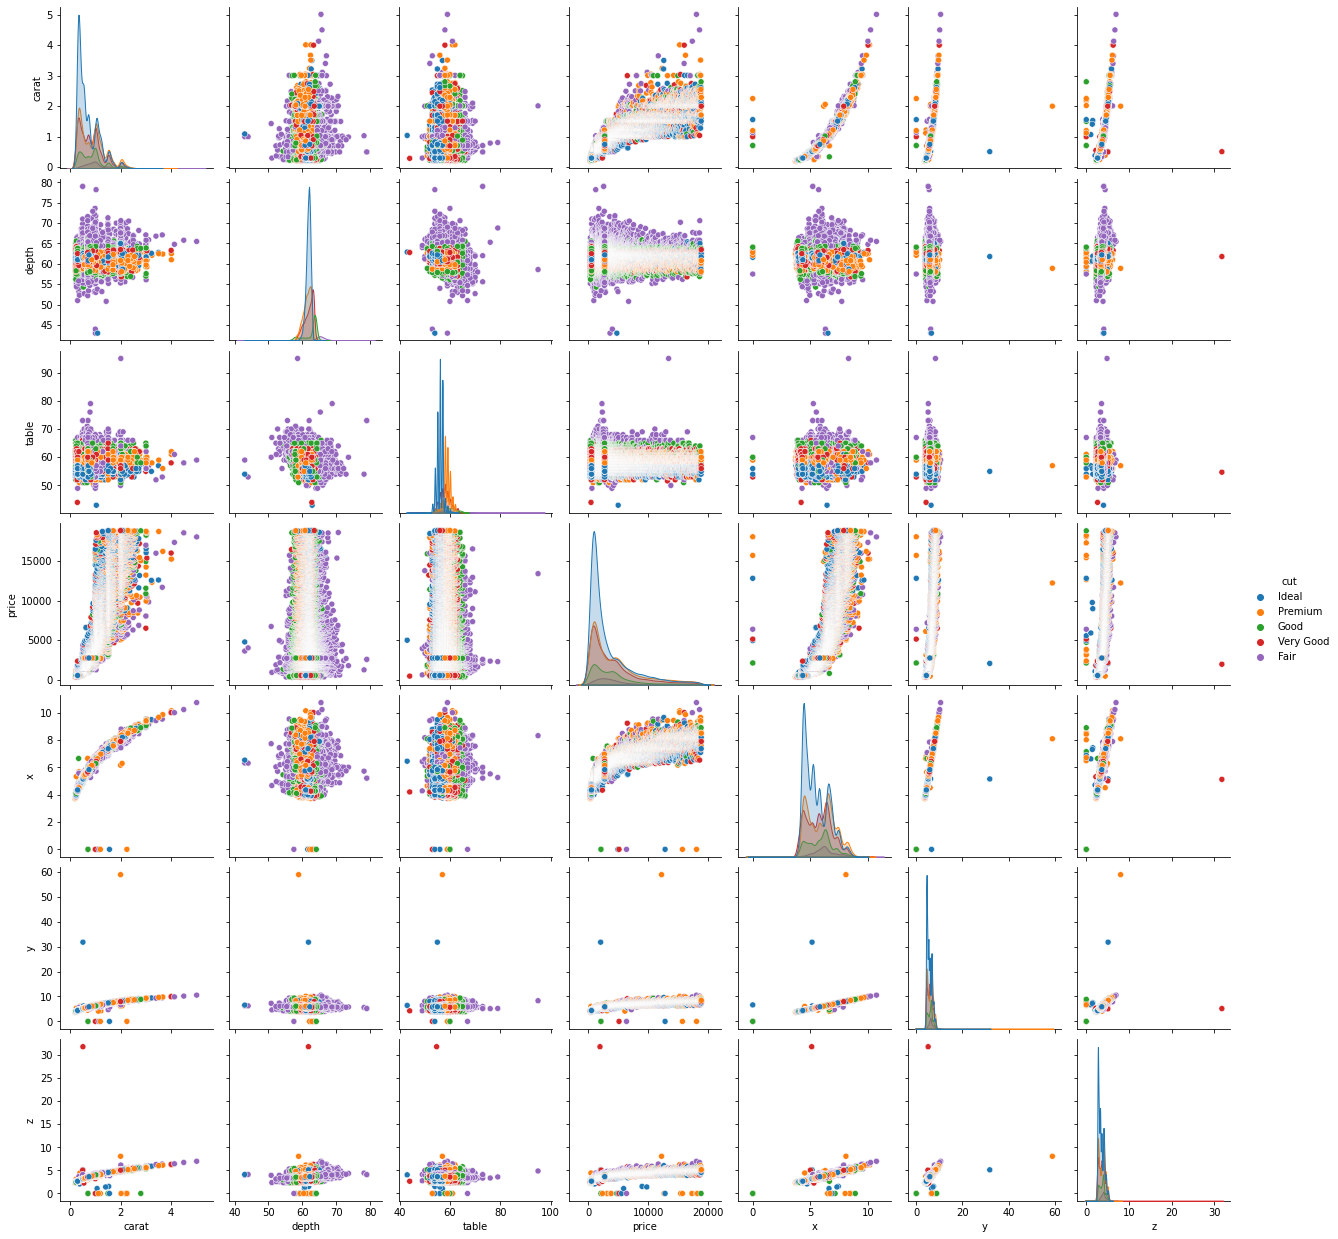

In [ ]:
sns.pairplot(data=diamonds, hue="cut")

notice in the past few cells how different `cut` `clarity` and `color` values have different means for `price`, this implies that they are good predictors for `price`.

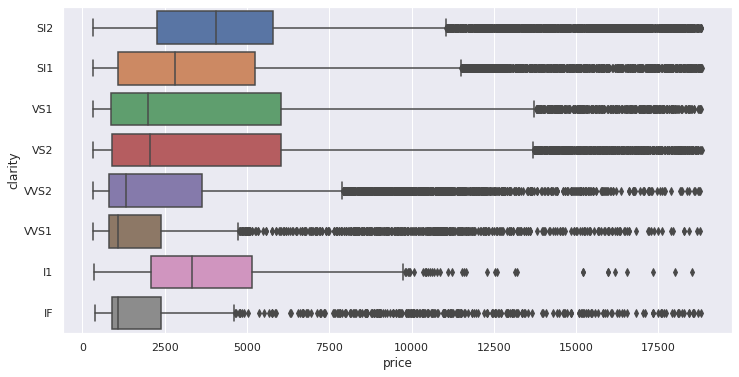

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data = diamonds, x="price", y="clarity")

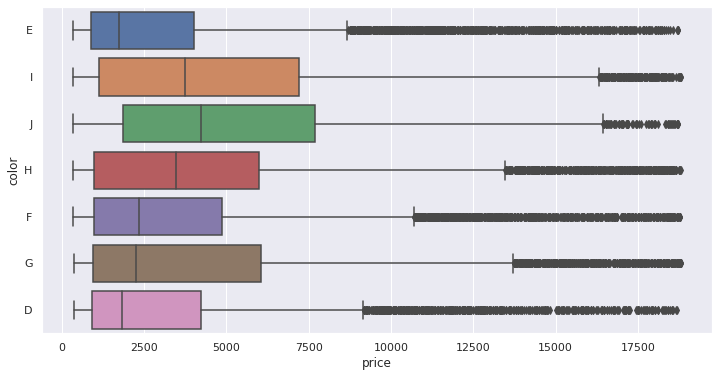

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data = diamonds, x="price", y="color")

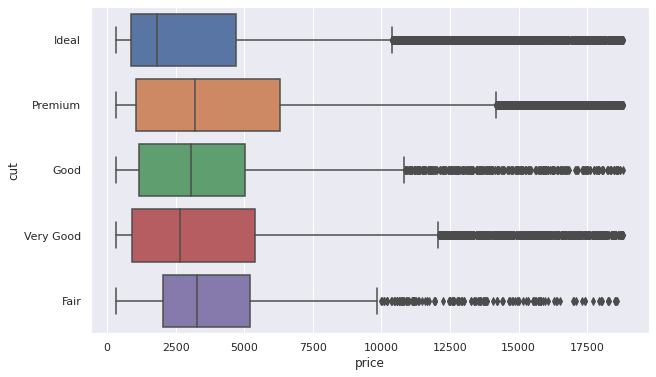

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data = diamonds, x="price", y="cut")

We manually calculate the values for outliers, lower outliers are less than negative 5,611 which is 
impossible, and the upper outliers are those more than 11,886.

In [ ]:
print(diamonds[(diamonds.price>11886)].count())

carat      3538
cut        3538
color      3538
clarity    3538
depth      3538
table      3538
price      3538
x          3538
y          3538
z          3538
dtype: int64


Out of 53,940 prices, only 3538 are outliers. Therefore, we choose to ignore them.

In [ ]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


it appears that size, dimensions are the best predicting factors for price 

*we use coolwarm because it make it easy to visually separate negative/positive correlation using only 2 colors.*

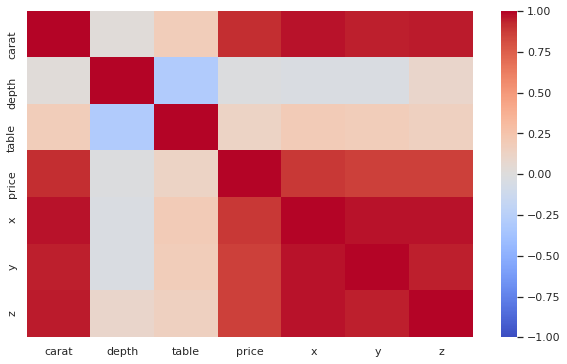

In [ ]:
sns.heatmap(data=diamonds.corr(), vmax=1, vmin=-1, cmap=sns.color_palette("coolwarm", as_cmap=True))

as we can see x/y/z/carats are highly correlated so we feature extraction is needed here

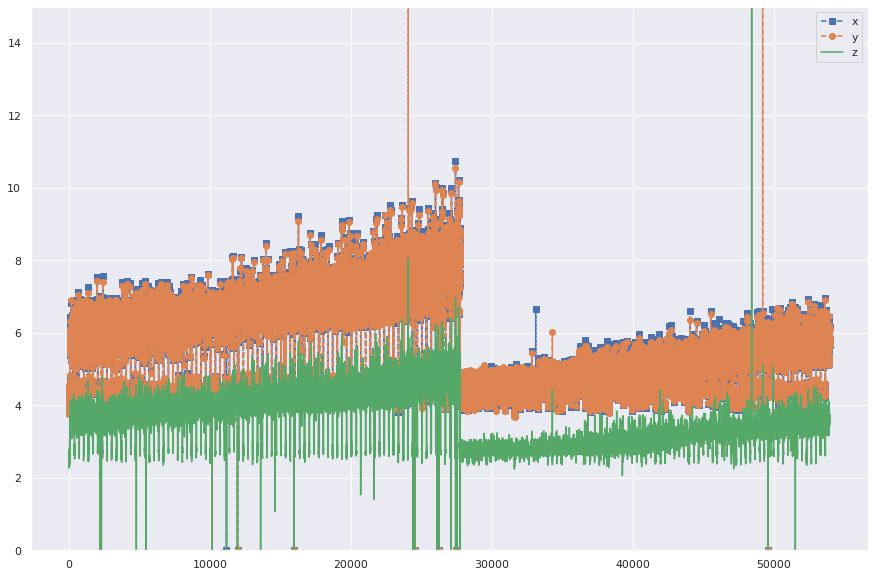

In [ ]:
fig, ax = plt.subplots()
diamonds[["x", "y", "z"]].plot(figsize=(15, 10), ylim=(0, 15), ax=ax, style=['s--','o--','-'])

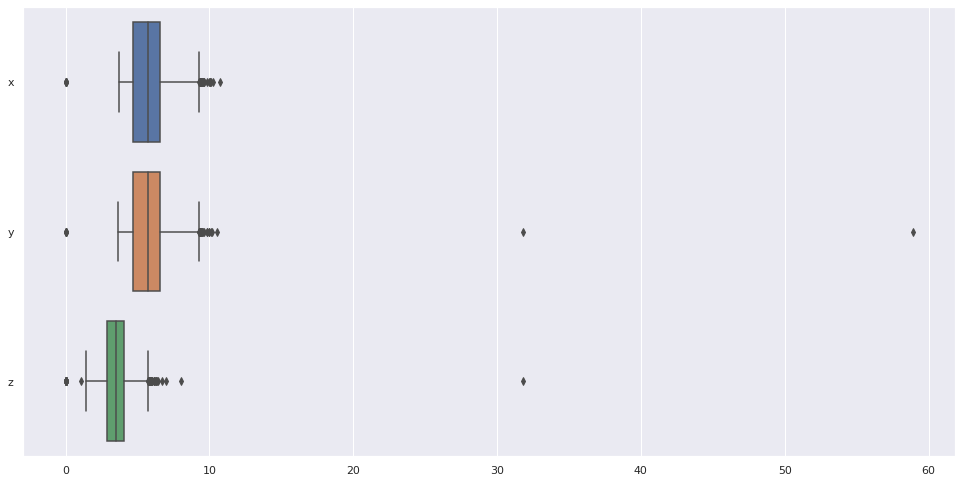

In [ ]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
sns.boxplot(data=diamonds[["x", "y", "z"]], orient="h")

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(diamonds["x"], diamonds["y"]))
print(mean_absolute_error(diamonds["x"], diamonds["z"]))
print(mean_absolute_error(diamonds["z"], diamonds["y"]))

0.04784964775676678
2.19341453466815
2.196781053021876


as we can see here, `x` and `y` are nearly identical, with z being almost identical save for a constant factor (an offset in the y axis).

a few outliers are also visible in the box plot 

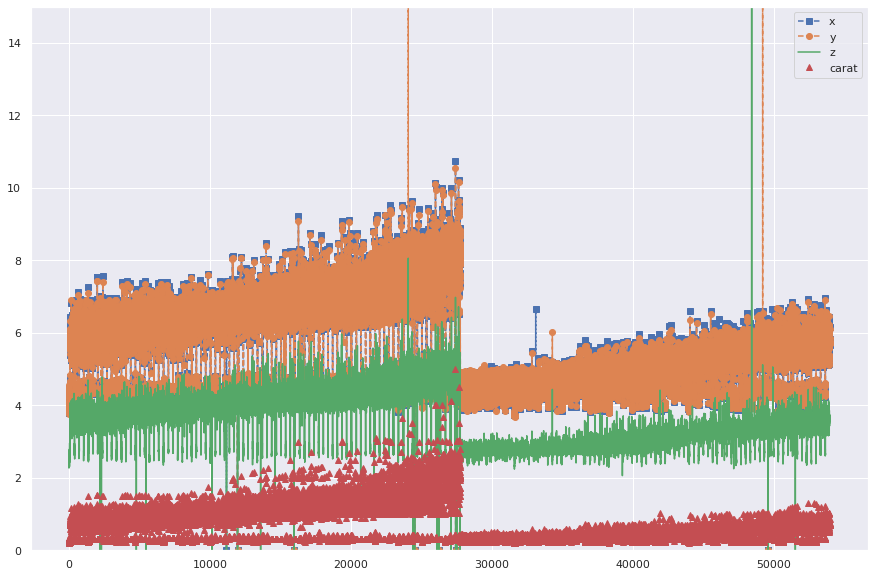

In [ ]:
fig, ax = plt.subplots()
dimensional_features = ["x", "y", "z", "carat"]
diamonds[dimensional_features].plot(figsize=(15, 10), ylim=(0, 15), ax=ax, style=['s--','o--','-', "^"])

In [ ]:
from sklearn.metrics import mean_absolute_error
for i in dimensional_features:
  for j in dimensional_features:
      print(i, j, mean_absolute_error(diamonds[i], diamonds[j]))

x x 0.0
x y 0.04784964775676678
x z 2.19341453466815
x carat 4.933574898034853
y x 0.04784964775676678
y y 0.0
y z 2.196781053021876
y carat 4.936903967371153
z x 2.19341453466815
z y 2.196781053021876
z z 0.0
z carat 2.7418685576566553
carat x 4.933574898034853
carat y 4.936903967371153
carat z 2.7418685576566553
carat carat 0.0


we use this equation to calculate the volume of the diamond $\sqrt[3]{x*y*z}$

we take the cube root so as to not mess with the scale of the data 


In [ ]:
size_column = np.cbrt(diamonds["x"] * diamonds["y"] * diamonds["z"])
size_column

0        3.367923
1        3.255599
2        3.364241
3        3.601763
4        3.730530
           ...   
53935    4.875878
53936    4.906394
53937    4.855175
53938    5.201948
53939    4.994239
Length: 53940, dtype: float64

here we see that `carat` is highly correlated with all 3 dimensions, this means that we may have to perform some dimensionality reduction 

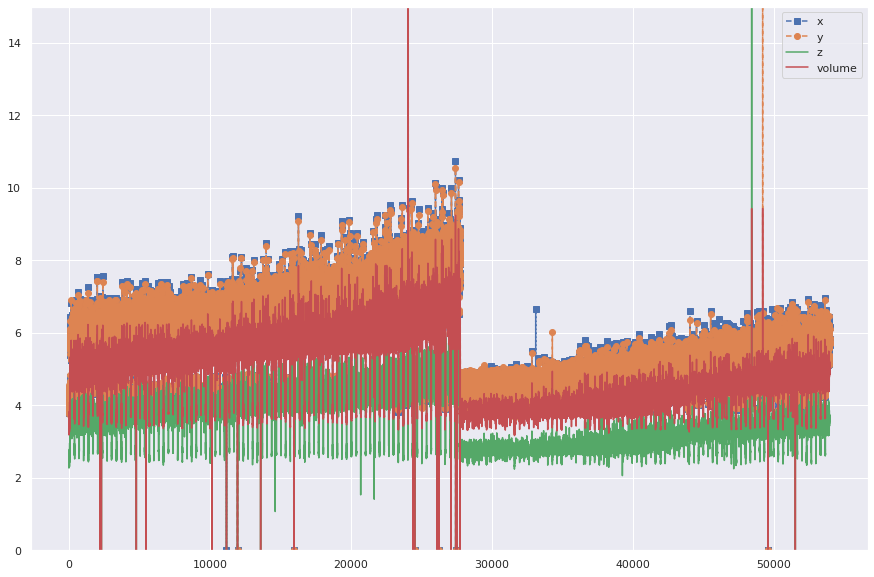

In [ ]:
fig, ax = plt.subplots()
dimensional_features = ["x", "y", "z"]
diamonds[dimensional_features].plot(figsize=(15, 10), ylim=(0, 15), ax=ax, style=['s--','o--','-'])
size_column.plot(ax=ax, legend=True, label="volume")



*   takes in a `DataFrame`
*   returns `ndarray`


do not mix

this class is for converting x, y, z to one dimension, we take the cube root to prevent the scale of the data from changing


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


class VolumeCalculator(BaseEstimator, TransformerMixin): # this works !
  def __init__(self, include_carat=False): # no *args or **kargs
    self.include_carat = include_carat
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X):
    #col_names = "x", "y", "z"
    #xi, yi, zi = [
    #diamonds.columns.get_loc(c) for c in col_names] # get the column indices
    #print(xi, yi, zi)
    cols = ["x", "y", "x"]
    if self.include_carat:
      volume_column_ = (X["x"] * X["y"] * X["z"] * X["carat"]) ** 0.25
      cols.append("carat")
    else:
      volume_column_ = np.cbrt(X["x"] * X["y"] * X["z"])
    return np.c_[X.drop(cols, axis=1), volume_column_]

the argument `include_carat` allows you to take carats as a fourth dimension to calculate volume since carats are also highly correlated with volume, this changes the equation to $\sqrt[4]{x*y*z*carat}$

In [ ]:
volC = VolumeCalculator()
volctest = volC.transform(diamonds)
for i in range(20):
  print(*volctest[i])
print(diamonds)

0.23 Ideal E SI2 61.5 55.0 326 2.43 3.3679229482507016
0.21 Premium E SI1 59.8 61.0 326 2.31 3.2555992157818823
0.23 Good E VS1 56.9 65.0 327 2.31 3.3642412957860457
0.29 Premium I VS2 62.4 58.0 334 2.63 3.601763025342844
0.31 Good J SI2 63.3 58.0 335 2.75 3.7305301998914326
0.24 Very Good J VVS2 62.8 57.0 336 2.48 3.3823174238518092
0.24 Very Good I VVS1 62.3 57.0 336 2.47 3.3863021549701116
0.26 Very Good H SI1 61.9 55.0 337 2.53 3.4848619944842985
0.22 Fair E VS2 65.1 61.0 337 2.49 3.314876635936626
0.23 Very Good H VS1 59.4 61.0 338 2.39 3.383017973685475
0.3 Good J SI1 64.0 55.0 339 2.73 3.6756299535581816
0.23 Ideal J VS1 62.8 56.0 340 2.46 3.3532357538156563
0.22 Premium F SI1 60.4 61.0 342 2.33 3.2621677528981365
0.31 Ideal J SI2 62.2 54.0 344 2.71 3.7208885465639367
0.2 Premium E SI2 60.2 62.0 345 2.27 3.183455462239396
0.32 Premium E I1 60.9 58.0 345 2.68 3.7297271157642182
0.3 Ideal I SI2 62.0 54.0 348 2.68 3.6872331351449525
0.3 Good J SI1 63.4 54.0 351 2.7 3.65920837488070

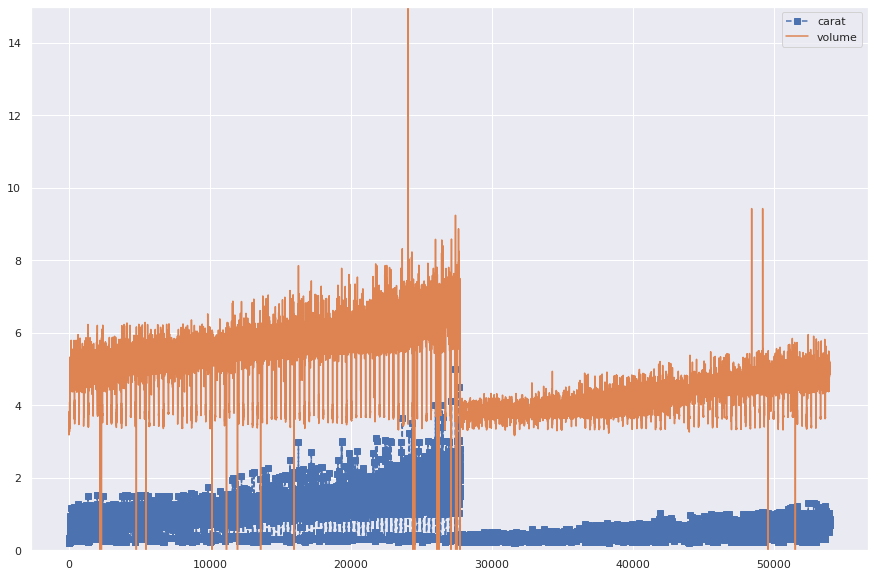

In [ ]:
fig, ax = plt.subplots()
diamonds[["carat"]].plot(figsize=(15, 10), ylim=(0, 15), ax=ax, style=['s--','o--'])
size_column.plot(ax=ax, legend=True, label="volume")

this class is deprecated dont use it, its here to run legacy  code and legacy code only.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Error warning: if you have a transformer that returns a numpy array and it is followed by a transformer that expects a `df` then the second will spit out an incomprehensible error message.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = ["x", "y", "z", "carat", "table", "depth"]

num_pipeline = Pipeline([
  ('volume_calc', VolumeCalculator()),
  ('std_scaler', StandardScaler()),
])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ["clarity", "cut", "color"]

In [ ]:
num_pipeline.fit_transform(diamonds[num_attribs])

array([[-1.57112919, -1.19816781, -1.09967199, -0.17409151, -1.58303551],
       [-1.74117497, -1.24036129,  1.58552871, -1.36073849, -1.7006671 ],
       [-1.74117497, -1.19816781,  3.37566251, -3.38501862, -1.58689114],
       ...,
       [ 0.03013526, -0.20662095,  1.13799526,  0.73334442, -0.02550302],
       [ 0.28520393,  0.13092691,  0.24292836, -0.52310533,  0.33765684],
       [ 0.14349912, -0.10113725, -1.09967199,  0.31452784,  0.12013235]])

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
   ("numerical", num_pipeline, num_attribs),
   ("categorical", OneHotEncoder(), cat_attribs)
 ])

remember to use `fit_transform()` and not transform here so as to not compute a new mean/variance for the `StandardScaler`.

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [ ]:
full_pipeline.fit_transform(diamonds)

array([[-1.57112919, -1.19816781, -1.09967199, ...,  0.        ,
         0.        ,  0.        ],
       [-1.74117497, -1.24036129,  1.58552871, ...,  0.        ,
         0.        ,  0.        ],
       [-1.74117497, -1.19816781,  3.37566251, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.03013526, -0.20662095,  1.13799526, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28520393,  0.13092691,  0.24292836, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.14349912, -0.10113725, -1.09967199, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
diamonds_prepped = full_pipeline.fit_transform(diamonds)
print(diamonds_prepped[:5])

[[-1.57112919 -1.19816781 -1.09967199 -0.17409151 -1.58303551  0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.        ]
 [-1.74117497 -1.24036129  1.58552871 -1.36073849 -1.7006671   0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.        ]
 [-1.74117497 -1.19816781  3.37566251 -3.38501862 -1.58689114  0.
   0.          0.          0.          1.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.        ]
 [-1.28771955 -1.07158736  0.24292836  0.45413336 -1.33814533  0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.  

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)

In [ ]:
full_pipeline.transform(train_set)

array([[ 1.74476356,  2.55705218,  2.92812906, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54027261,  0.44737803,  1.13799526, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79534128,  0.63724871,  0.24292836, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.18852618, -0.98720039,  0.24292836, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39856779,  0.21531388,  0.69046181, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80951176,  0.72163567,  0.24292836, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
prepped_train_set, training_labels = full_pipeline.transform(train_set), train_set["price"]



tree_reg.fit(prepped_train_set, training_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
some_data, test_labels = full_pipeline.transform(test_set), test_set["price"]
tree_reg_predictions = tree_reg.predict(some_data)
for i in range(10):
  print("preictions", tree_reg_predictions[i], "labels", test_labels.to_numpy()[i])

preictions 559.0 labels 559
preictions 2189.0 labels 2201
preictions 1158.0 labels 1238
preictions 1274.0 labels 1304
preictions 10210.0 labels 6901
preictions 3991.0 labels 3011
preictions 2346.0 labels 1765
preictions 1906.5 labels 1679
preictions 2205.0 labels 2102
preictions 7100.0 labels 4789


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def eval_model(model, training_data, train_labels, test_data, test_labels):
    predictions = model.predict(test_data)

    print("Predicitions: ", *predictions[:5])
    print("Labels: ", *test_labels[:5])

    mse = mean_squared_error(test_labels, predictions)
    print("MSE: ", mse, ", RMSE: ", np.sqrt(mse), ", MAE: ", mean_absolute_error(test_labels, predictions))

    scores = cross_val_score(model, training_data, train_labels, scoring="neg_mean_squared_error", cv=10)
    
    rmse_scores = np.sqrt(-scores)
    print("RMSE Scores: ", *rmse_scores)
    print("Mean: ", rmse_scores.mean(), ", STD: ", rmse_scores.std())

In [ ]:
eval_model(tree_reg, prepped_train_set, training_labels, some_data, test_labels)

Predicitions:  559.0 2189.0 1158.0 1274.0 10210.0
Labels:  559 2201 1238 1304 6901
MSE:  546909.4575454209 , RMSE:  739.533270073376 , MAE:  360.2484859720677
RMSE Scores:  714.5334531326434 716.5728232593524 792.9163134898125 704.782206222463 760.2277752439394 728.6520149010527 745.291835419757 693.213920418384 723.0800887867083 741.7649985417694
Mean:  732.1035429415881 , STD:  27.674077306589865


In [ ]:
carat_num_pipeline = Pipeline([
  ('volume_calc', VolumeCalculator(include_carat=True)),
  ('std_scaler', StandardScaler()),
])

full_pipeline_with_carat = ColumnTransformer([
   ("numerical", carat_num_pipeline, num_attribs),
   ("categorical", OneHotEncoder(), cat_attribs)
 ])
#create new pipelines
training_data_with_carat = full_pipeline_with_carat.fit_transform(train_set)
#create training set
print(training_data_with_carat[:5])

  (0, 0)	1.7382067062179185
  (0, 1)	2.933860551957393
  (0, 2)	-2.550747615248908
  (0, 3)	2.2011645561643363
  (0, 7)	1.0
  (0, 13)	1.0
  (0, 19)	1.0
  (1, 0)	0.5377332010575323
  (1, 1)	1.1395745344447317
  (1, 2)	-1.2204264729604153
  (1, 3)	0.6046098181335481
  (1, 7)	1.0
  (1, 16)	1.0
  (1, 18)	1.0
  (2, 0)	0.7919511197973784
  (2, 1)	0.24243152568840112
  (2, 2)	0.5299960826823396
  (2, 3)	0.7482266045866318
  (2, 9)	1.0
  (2, 15)	1.0
  (2, 21)	1.0
  (3, 0)	1.243894086445995
  (3, 1)	3.382432056335558
  (3, 2)	-0.1701729395747624
  (3, 3)	1.3800498676318216
  (3, 7)	1.0
  (3, 13)	1.0
  (3, 18)	1.0
  (4, 0)	1.3992494812314573
  (4, 1)	-0.20613997868976416
  (4, 2)	0.24992847377949975
  (4, 3)	1.4605559223661295
  (4, 8)	1.0
  (4, 16)	1.0
  (4, 20)	1.0


In [ ]:
tree_reg_with_carat = DecisionTreeRegressor()
tree_reg_with_carat.fit(training_data_with_carat, train_set["price"])
#train
test_set_with_carat = full_pipeline_with_carat.transform(test_set)
tree_reg_predictions_with_carat = tree_reg_with_carat.predict(test_set_with_carat)
for i in range(10):
  print("preictions", tree_reg_predictions_with_carat[i], "labels", test_labels.to_numpy()[i])

preictions 559.0 labels 559
preictions 2119.0 labels 2201
preictions 1158.0 labels 1238
preictions 1274.0 labels 1304
preictions 10698.0 labels 6901
preictions 4118.0 labels 3011
preictions 1680.0 labels 1765
preictions 1701.0 labels 1679
preictions 2406.0 labels 2102
preictions 5818.0 labels 4789


In [ ]:
eval_model(tree_reg_with_carat, training_data_with_carat, training_labels, test_set_with_carat, test_labels)

Predicitions:  559.0 2119.0 1158.0 1274.0 10698.0
Labels:  559 2201 1238 1304 6901
MSE:  531394.4242316565 , RMSE:  728.9680543286217 , MAE:  354.62683846248916
RMSE Scores:  737.385225618717 771.3480256603331 797.1277487197802 774.6272868003332 733.7506490008927 738.0047418343606 749.6041746649789 744.4083463881011 716.3801725721025 769.3697051077808
Mean:  753.200607636738 , STD:  22.988668862702553


conclusion: dont lump in carats with the rest of the dimensions.

now we try training without transforming `xyz` into  a single feature

In [ ]:
xyz_num_pipeline = Pipeline([
  ('std_scaler', StandardScaler()),
])

full_pipeline_with_xyz = ColumnTransformer([
   ("numerical", xyz_num_pipeline, num_attribs),
   ("categorical", OneHotEncoder(), cat_attribs)
 ])


xyz_tree_reg = DecisionTreeRegressor()
xyz_prepped_train_set = full_pipeline_with_xyz.fit_transform(train_set)



xyz_tree_reg.fit(xyz_prepped_train_set, training_labels)

xyz_test_set = full_pipeline_with_xyz.fit_transform(test_set)

xyz_tree_reg_predictions = xyz_tree_reg.predict(xyz_test_set)
for i in range(10):
  print("preictions", xyz_tree_reg_predictions[i], "labels", test_labels.to_numpy()[i])

preictions 582.0 labels 559
preictions 2484.0 labels 2201
preictions 1238.0 labels 1238
preictions 1337.0 labels 1304
preictions 10798.0 labels 6901
preictions 4600.0 labels 3011
preictions 1799.0 labels 1765
preictions 1694.0 labels 1679
preictions 2022.0 labels 2102
preictions 5852.0 labels 4789


In [ ]:
eval_model(xyz_tree_reg, xyz_prepped_train_set, training_labels, xyz_test_set, test_labels)

Predicitions:  582.0 2484.0 1238.0 1337.0 10798.0
Labels:  559 2201 1238 1304 6901
MSE:  542592.4981460882 , RMSE:  736.6087822895463 , MAE:  374.51733407489803
RMSE Scores:  715.4841968538765 732.31670927636 793.1675679123226 746.9630728578286 782.1093375078178 752.9245896617173 771.515551780798 707.0787949358771 774.2258057697475 715.5024110998419
Mean:  749.1288037656187 , STD:  29.138971073751858


pipeline summary: 
*  `full_pipeline_with_carat` is the pipeline with the lowest MAE  and RMSE so we use that to train the rest of the models, it compresses `carat` and `xyz` into one feature using the equation $\sqrt[4]{x*y*z*carat}$, this is because they are all highly correlatec
* `full_pipeline_with_xyz` is the second best pipeline, it does not modify* any * of the features.
* `full_pipeline` compresses `xyz` into one feature using $\sqrt[3]{x*y*z}$




## Now we start fine tuning 

**Grid Search**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [10, 30, 40], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [30, 40], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(prepped_train_set,training_labels)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

note: we are using pipeline 1 for the search

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 40}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

notice how the best params are the highest ones, maybe we should aim higher then

In [ ]:
param_grid2 = [
 {'n_estimators': [45, 50, 60], 'max_features': [8, 12, 16]},
 {'bootstrap': [False], 'n_estimators': [10, 20], 'max_features': [3, 4, 8]},
 ]
forest_reg2 = RandomForestRegressor()
grid_search2 = GridSearchCV(forest_reg2, param_grid2, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search2.fit(prepped_train_set, training_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search2.best_params_

{'max_features': 16, 'n_estimators': 60}

it appears that after taking the original hyper parameters to the semi finals, a better configuration has been found.

In [ ]:
cvres = grid_search2.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

565.7294523755558 {'max_features': 8, 'n_estimators': 45}
564.6318599742082 {'max_features': 8, 'n_estimators': 50}
565.0110569037348 {'max_features': 8, 'n_estimators': 60}
560.8427794039015 {'max_features': 12, 'n_estimators': 45}
560.8350788629904 {'max_features': 12, 'n_estimators': 50}
558.9667385304195 {'max_features': 12, 'n_estimators': 60}
560.2597717393085 {'max_features': 16, 'n_estimators': 45}
560.1619597348755 {'max_features': 16, 'n_estimators': 50}
555.7179376892225 {'max_features': 16, 'n_estimators': 60}
652.9623615689336 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
624.6673193147878 {'bootstrap': False, 'max_features': 3, 'n_estimators': 20}
629.1223022290656 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
600.9523184394649 {'bootstrap': False, 'max_features': 4, 'n_estimators': 20}
589.4010709311183 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
576.9430339942351 {'bootstrap': False, 'max_features': 8, 'n_estimators': 20}


In [ ]:
final_model = grid_search2.best_estimator_

eval_model(final_model, prepped_train_set, training_labels, some_data, test_labels)

Predicitions:  542.2166666666667 2373.954166666667 1154.8833333333334 1227.43 10059.52777777778
Labels:  559 2201 1238 1304 6901
MSE:  298066.3313608707 , RMSE:  545.9545140035667 , MAE:  277.1828161365406
RMSE Scores:  531.4494374251113 507.529610215596 612.5653814324188 565.036760062477 569.2138276258344 518.7721873756069 588.5062497256329 516.2839418632877 541.4948101909241 546.0172982814972
Mean:  549.6869504198387 , STD:  32.15503063451449


Now thats a 20% decrease in MAE and RMSE :D

In [ ]:
final_model_pipeline = Pipeline([
    ('data_prep', full_pipeline),
    ('predictor', final_model)
])

this is pipeline that as a predict method, it calls the `predict` method of the last transformer
# IMPORTANT
you must use the same pipeline for the data prep as the one used for the training, if you use pipeline A for model training and pipeline B for testing you will get an error message because when you fit the model, the number of features, etc will be adjusted for the model.

In [ ]:
final_model_predictions_test = final_model_pipeline.predict(test_set)
print("label    prediction", *zip(test_labels[:20], final_model_predictions_test[:20]), sep='\n')

label    prediction
(559, 542.2166666666667)
(2201, 2373.954166666667)
(1238, 1154.8833333333334)
(1304, 1227.43)
(6901, 10059.52777777778)
(3011, 3886.483333333333)
(1765, 2069.495238095238)
(1679, 1812.8750396825394)
(2102, 2103.1)
(4789, 5741.875)
(855, 688.5388888888889)
(13134, 13054.042777777779)
(1367, 1591.7333333333333)
(2401, 2255.1472222222224)
(1440, 2154.85)
(10286, 11223.2)
(2958, 3951.179166666667)
(1397, 1378.838888888889)
(9904, 10834.9)
(552, 620.754484126984)


**Randomized Search**
it takes way to long to process so we skipped it 

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import uniform
#logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
#distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
#clf = RandomizedSearchCV(logistic, distributions, random_state=0)
#search = clf.fit(prepped_train_set,training_labels)

In [ ]:
#search.best_params_

# Model Analysis

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.93844884e-01, 4.45238966e-01, 5.43414113e-03, 6.76692728e-03,
       2.52514288e-01, 1.06998946e-02, 5.56816831e-03, 7.69738838e-03,
       1.56928757e-02, 3.27272705e-03, 3.53975318e-03, 5.59856863e-03,
       7.64548031e-03, 8.01176237e-04, 4.25667740e-04, 1.62998498e-03,
       7.76932050e-04, 5.00019525e-04, 3.65235959e-03, 2.79253864e-03,
       2.91056821e-03, 2.79426411e-03, 4.39487009e-03, 6.47044225e-03,
       9.33711393e-03])

In [ ]:
extra_attribs=["tree_reg_predictions_with_carat,full_pipeline_with_xyz,full_pipeline"]
cat_encoder = full_pipeline.named_transformers_["categorical"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.44523896572512384, 'y'),
 (0.25251428814046134, 'table'),
 (0.19384488425248256, 'x'),
 (0.01569287571107562, 'IF'),
 (0.010699894580390418, 'depth'),
 (0.007697388375483738, 'I1'),
 (0.007645480306928245, 'VS2'),
 (0.006766927276500551, 'carat'),
 (0.0055985686256594235, 'VS1'),
 (0.005568168310512915,
  'tree_reg_predictions_with_carat,full_pipeline_with_xyz,full_pipeline'),
 (0.005434141125372957, 'z'),
 (0.0035397531757831524, 'SI2'),
 (0.0032727270450632457, 'SI1'),
 (0.0008011762365696706, 'VVS1'),
 (0.0004256677396578215, 'VVS2')]

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_model_predictions_test - test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([520.58339682, 570.19785135])

We also tried out using OrdinalEncoder but got worse results

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import clone

carat_num_pipeline2 = Pipeline([
  ('volume_calc', VolumeCalculator(include_carat=True)),
  ('std_scaler', StandardScaler()),
]) # you need to instantiate a new one, idk why clone causes a missing column error

full_pipeline_ordinal = ColumnTransformer([
   ("numerical", carat_num_pipeline2, num_attribs),
   ("categorical", OrdinalEncoder(), cat_attribs)
 ])

In [ ]:
ordinal_tree_reg = DecisionTreeRegressor()
print(cat_attribs)
print(train_set[:5])
ordinal_prepped_train_set = full_pipeline_ordinal.fit_transform(train_set)
print(ordinal_prepped_train_set[:5])


ordinal_tree_reg.fit(ordinal_prepped_train_set, training_labels)

ordinal_prepped_test_set = full_pipeline_ordinal.fit_transform(test_set)

ordinal_tree_reg_predictions = ordinal_tree_reg.predict(ordinal_prepped_test_set)
for i in range(10):
  print("preictions", ordinal_tree_reg_predictions[i], "labels", test_labels.to_numpy()[i])

['clarity', 'cut', 'color']
       carat        cut color clarity  depth  table  price     x     y     z
26546   2.01       Good     F     SI2   58.1   64.0  16231  8.23  8.19  4.77
9159    1.01  Very Good     E     SI2   60.0   60.0   4540  6.57  6.49  3.92
14131   1.10    Premium     H     VS2   62.5   58.0   5729  6.59  6.54  4.10
15757   1.50       Good     E     SI2   61.5   65.0   6300  7.21  7.17  4.42
24632   1.52  Very Good     G     VS1   62.1   57.0  12968  7.27  7.32  4.53
[[ 1.73820671  2.93386055 -2.55074762  2.20116456  3.          1.
   2.        ]
 [ 0.5377332   1.13957453 -1.22042647  0.60460982  3.          4.
   1.        ]
 [ 0.79195112  0.24243153  0.52999608  0.7482266   5.          3.
   4.        ]
 [ 1.24389409  3.38243206 -0.17017294  1.38004987  3.          1.
   1.        ]
 [ 1.39924948 -0.20613998  0.24992847  1.46055592  4.          4.
   3.        ]]
preictions 559.0 labels 559
preictions 2119.0 labels 2201
preictions 1215.0 labels 1238
preictions 1198.

In [ ]:
eval_model(ordinal_tree_reg, ordinal_prepped_train_set, training_labels, ordinal_prepped_test_set, test_labels)

Predicitions:  559.0 2119.0 1215.0 1198.5 11428.0
Labels:  559 2201 1238 1304 6901
MSE:  548041.3305505345 , RMSE:  740.298136260341 , MAE:  370.2605595723644
RMSE Scores:  720.0779396841007 786.689033121861 764.5937205552718 778.8560566320913 732.0088521267096 793.6425480432815 785.5955539290126 732.7298286561684 722.8289154607307 750.510530925277
Mean:  756.7532979134505 , STD:  27.135175249148617


In [ ]:
param_grid_ordinal = [
 {'n_estimators': [2, 4, 6], 'max_features': [2, 4, 6]},
 {'bootstrap': [False], 'n_estimators': [2, 4, 6], 'max_features': [2, 4, 6]},
 ]
forest_reg_ordinal = RandomForestRegressor()
grid_search_ordinal = GridSearchCV(forest_reg_ordinal, param_grid_ordinal, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search_ordinal.fit(ordinal_prepped_train_set, training_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search_ordinal.best_params_

{'max_features': 6, 'n_estimators': 6}

In [ ]:
cvres = grid_search_ordinal.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

885.1040761688598 {'max_features': 2, 'n_estimators': 2}
763.3441894120023 {'max_features': 2, 'n_estimators': 4}
731.9240413271594 {'max_features': 2, 'n_estimators': 6}
716.6756516066016 {'max_features': 4, 'n_estimators': 2}
643.4736112837483 {'max_features': 4, 'n_estimators': 4}
630.1441685809463 {'max_features': 4, 'n_estimators': 6}
700.5201662833473 {'max_features': 6, 'n_estimators': 2}
634.3732429617334 {'max_features': 6, 'n_estimators': 4}
620.2617517206282 {'max_features': 6, 'n_estimators': 6}
826.766019127661 {'bootstrap': False, 'max_features': 2, 'n_estimators': 2}
737.6341985121837 {'bootstrap': False, 'max_features': 2, 'n_estimators': 4}
683.100131767624 {'bootstrap': False, 'max_features': 2, 'n_estimators': 6}
707.1105749819183 {'bootstrap': False, 'max_features': 4, 'n_estimators': 2}
643.1748812537212 {'bootstrap': False, 'max_features': 4, 'n_estimators': 4}
629.3862242260153 {'bootstrap': False, 'max_features': 4, 'n_estimators': 6}
706.5893455914139 {'bootstr

In [ ]:
eval_model(grid_search_ordinal.best_estimator_, ordinal_prepped_train_set, training_labels, ordinal_prepped_test_set, test_labels)

Predicitions:  544.8333333333334 2317.3333333333335 1114.0777777777778 1180.75 9517.333333333334
Labels:  559 2201 1238 1304 6901
MSE:  359840.7509551416 , RMSE:  599.8672777832957 , MAE:  309.8232260565826
RMSE Scores:  618.4154502047691 616.6099366400223 654.9218244853256 631.1225519891566 619.4816329839614 576.9173184393441 640.1887591737482 595.4407914029167 598.7250131958824 604.7429973983016
Mean:  615.6566275913428 , STD:  21.728155806660677
